# Исследование причин убытков в компании Procrastinate Pro+

**Краткое описание:** есть развлекательное приложение Procrastinate Pro+. Были сделаны огромные вложения в рекламу, но компания все еще терпит убытки.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Цель проекта:** разобраться в причинах и помочь компании выйти в плюс.

**Описание данных:**

Структура *visits_info_short.csv*:

- ```User Id``` — уникальный идентификатор пользователя,
- ```Region``` — страна пользователя,
- ```Device``` — тип устройства пользователя,
- ```Channel``` — идентификатор источника перехода,
- ```Session Start``` — дата и время начала сессии,
- ```Session End``` — дата и время окончания сессии.

Структура *orders_info_short.csv*:
- ```User Id``` — уникальный идентификатор пользователя,
- ```Event Dt``` — дата и время покупки,
- ```Revenue``` — сумма заказа.

Структура *costs_info_short.csv*:
- ```dt``` — дата проведения рекламной кампании,
- ```Channel``` — идентификатор рекламного источника,
- ```costs``` — расходы на эту кампанию.

**План работы:**

1. Загрузка и изучение данных
2. Предобработка данных
3. Исследовательский анализ
4. Изучение трат на маркетинг
5. Оценить окупаемость рекламы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

## Загрузка и изучение данных

In [2]:
try:
    visits = pd.read_csv('.\\datasets\\visits_info_short.csv')
    orders = pd.read_csv('.\\datasets\\orders_info_short.csv')
    costs = pd.read_csv('.\\datasets\\costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [5]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Данные были загружены и предварительно изучены.

В таблицах столбцы данных имеют некорректный вид, некоторые столбцы имеют неверный тип данных. Пропусков в данных не имеется.

Необходимо исправить:
- названия столбцов,
- тип данных некоторых столбцов.

Так же необходимо проверить данные на наличие дубликатов.

## Предобработка данных

### Названия столбцов

In [9]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [10]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [11]:
costs.columns = costs.columns.str.lower().str.replace(' ', '_')
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

Названия столбцов были исправлены.

### Типы данных

В таблице visits необходимо привести столбцы ```session_start``` и ```session_end``` к типу данных datetime.

In [12]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


В таблице orders необходимо привести столбец ```event_dt``` к типу данных datetime.

In [13]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


В таблице costs создадим новый столбец под названием full_dt из столбца ```dt``` имеющий тип datetime, а сам столбец dt станет значением date от столбца full_dt.

In [14]:
costs['full_dt'] = pd.to_datetime(costs['dt'])
costs['dt'] = costs['full_dt'].dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   object        
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
 3   full_dt  1800 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 56.4+ KB


Все неверные типы данных столбцов были приведены к верным.

### Проверка на наличие дубликатов

In [15]:
visits.duplicated().sum()

0

In [16]:
orders.duplicated().sum()

0

In [17]:
costs.duplicated().sum()

0

Явные дубликаты в таблицах не были выявлены.

Посмотрим есть ли неявные.

In [18]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [19]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [20]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [21]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Неявных дубликатов также не было выявлено.

**Мини-вывод:** в процессе предобработки данных было сделано следующее:
- названия столцов были исправлены,
- типа данных столбцов тоже были исправлены,
- была выполнена проверка таблиц на дупликаты.

## Подготовка функций

### Функция создания профилей пользователей

In [22]:
def get_profiles(sessions, orders, ad_costs):
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({
            'session_start': 'first',
            'channel': 'first',
            'device': 'first',
            'region': 'first'
        })
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    
    # определяем дату и месяц первого посещения
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.to_period('M').dt.to_timestamp().dt.date
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # найдем сколько было потрачено средств на привлечение пользователя 
    # в определенную дату из определенного канала
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left'
    )
    
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

### Функция для расчета удержания

In [23]:
def get_retention(profiles, sessions, observation_date,
                  horizon_days, dimensions=[], ignore_horizon=False):
    
    # добавляем столбец payer для группировки
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    return result_raw, result_grouped, result_in_time

### Функция для расчета конверсии

In [24]:
def get_conversion(profiles, purchases, observation_date, horizon_days,
                  dimensions=[], ignore_horizon=False):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_aqcuisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(first_purchases[['user_id', 'event_dt']], on='user_id', how='left')
    
    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
        
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
        
    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    
    return result_raw, result_grouped, result_in_time

### Функция для расчета LTV и ROI

In [25]:
def get_ltv(profiles, purchases, observation_date, horizon_days,
           dimensions=[], ignore_horizon=False):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_aqcuisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
        
    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        
        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        
        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes
        
        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']
        
        # оставляем необходимые столбцы
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        
        return result, roi
    
    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
        
    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    return (
        result_raw, 
        result_grouped,
        result_in_time,
        roi_grouped,
        roi_in_time
    )

### Функция для сглаживания фрейма

In [26]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

### Функция для визуализации удержания

In [27]:
def plot_retention(retention, retention_history, horizon, window=7):
    plt.figure(figsize=(15, 10))
    retention = retention.drop(columns=['cohort_size', 0])
    
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon-1]]
    
    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
        
    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    
    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    
    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]

    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(f'Динамика удержания платящих пользователей на {horizon}-й день')
    
    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(f'Динамика удержания неплатящих пользователей на {horizon}-й день')
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации конверсии

In [28]:
def plot_conversion(conversion, conversion_history, horizon, window=7):
    plt.figure(figsize=(15, 5))
    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon-1]]
    
    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    
    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name
        for name in conversion_history.index.names
        if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title(f'Динамика конверсии пользователей на {horizon}-й день')
    
    plt.tight_layout()
    plt.show()

### Функция для визуализации LTV и ROI

In [29]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    plt.figure(figsize=(20, 10))
    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    
    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]
    
    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]
    
    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    
    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [
        name
        for name in ltv_history.index.names
        if name not in ['dt']
    ]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title(f'Динамика LTV пользователей на {horizon}-й день')
    
    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [
        name
        for name in cac_history.index.names
        if name not in ['dt']
    ]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(f'Динамика стоимости привлечения пользователей')
    
    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    
    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [
        name
        for name in roi_history.index.names
        if name not in ['dt']
    ]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title(f'Динамика ROI пользователей на {horizon}-й день')
    
    plt.tight_layout()
    plt.show() 

## Исследовательский анализ

### Создание профилей пользователей

In [30]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [31]:
min_date_acquisition = profiles['dt'].min()
max_date_acquisition = profiles['dt'].max()
print(min_date_acquisition, max_date_acquisition)

2019-05-01 2019-10-27


Были созданы профили пользователей и определены максимальная(2019-10-27) и минимальная(2019-05-01) даты привлечения пользователей.

### Страны пользователей

Создадим функции для создания таблицы и графиков, для отображения количества пользователей по признаку и долю платящих пользователей по этому признаку.

In [32]:
# функция для создания таблицы по признаку
def get_inf_count_by_dimension(profiles, dim):
    count_profiles_by_dim = (
        profiles.groupby(dim)['user_id'].count()
        .reset_index()
        .rename(columns={'user_id': 'all_users'})
        .merge(
            profiles.query('payer == True').groupby(dim)['user_id'].count()
            .reset_index().rename(columns={'user_id': 'payers_users'}), on=dim
        )
        .set_index(dim)
    )
    count_profiles_by_dim['percent_payers'] = count_profiles_by_dim['payers_users'] * 100 / count_profiles_by_dim['all_users']
    return count_profiles_by_dim

In [33]:
# функция для создания графика с количеством пользователей
def plot_count_user(table, title, param):
    (
        table[['all_users', 'payers_users']].sort_values(by=['all_users'], ascending=False)
        .plot(kind='bar', grid=True,
              title=title,
              xlabel=param, ylabel='Количество пользователей', figsize=(8, 6)
             )
    )

In [34]:
# функция для создания графика с долей платящих пользователей
def plot_percent_payer_user(table, title, param):
    table['percent_payers'].sort_values(ascending=False).plot(
        kind='bar', grid=True, xlabel=param, ylabel='Процент (%)',
        title=title
    )

In [35]:
count_profiles_by_region = get_inf_count_by_dimension(profiles, 'region')
count_profiles_by_region

,all_users,payers_users,percent_payers
region,,,
France,17450,663,3.799427
Germany,14981,616,4.111875
UK,17575,700,3.982930
United States,100002,6902,6.901862


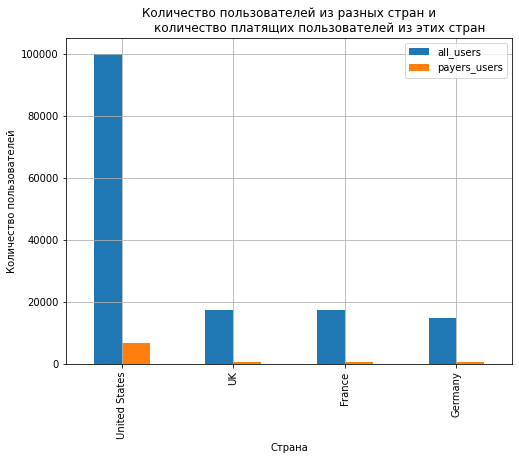

In [36]:
plot_count_user(count_profiles_by_region,
                '''Количество пользователей из разных стран и
                количество платящих пользователей из этих стран''', 'Страна')

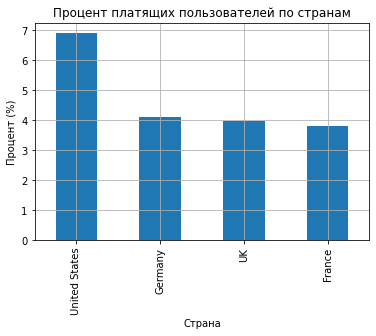

In [37]:
plot_percent_payer_user(count_profiles_by_region,
                       'Процент платящих пользователей по странам', 'Страна')

По полученной таблице и графикам можно увидеть, что пользователей больше всего из Америки.

Процент платящих пользователей по отношению к числу пользователей из страны так же самый большой у Америки, почти 7%, у Великобритании, Германии и Франции процент платящих пользователей меньше, около 4%.

### Устройства пользователей

In [38]:
count_profiles_by_device = get_inf_count_by_dimension(profiles, 'device')
count_profiles_by_device

,all_users,payers_users,percent_payers
device,,,
Android,35032,2050,5.851793
Mac,30042,1912,6.364423
PC,30455,1537,5.046790
iPhone,54479,3382,6.207897


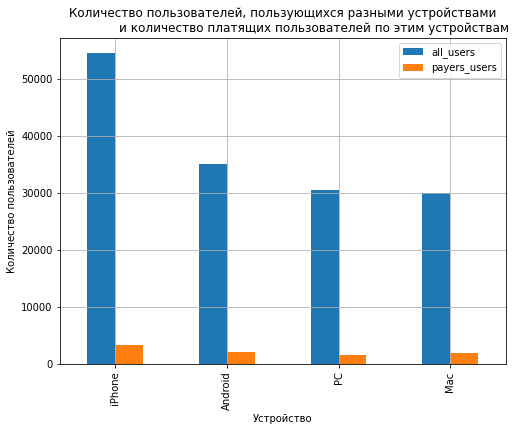

In [39]:
plot_count_user(count_profiles_by_device,
                '''Количество пользователей, пользующихся разными устройствами
                и количество платящих пользователей по этим устройствам''', 'Устройство')

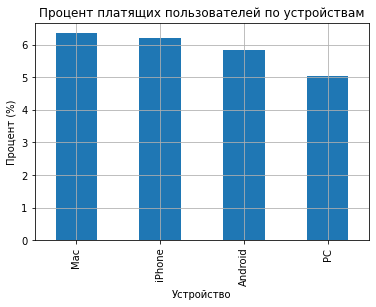

In [40]:
plot_percent_payer_user(count_profiles_by_device,
                       'Процент платящих пользователей по устройствам', 'Устройство')

По полученным данным можно увидеть, что больше всего пользователей приходят с таких устройств как iPhone, меньше всего с устройств Mac.

Самая большая доля платящих пользователей приходится на такие устройста как Mac и iPhone, для каждого устройста процент платящих пользователей составляет чуть более 6%. Самая маленькая доля платящих пользователей приходится на устройство PC, около 5%.

### Рекламные источники пользователей

In [41]:
count_profiles_by_channel = get_inf_count_by_dimension(profiles, 'channel')
count_profiles_by_channel

,all_users,payers_users,percent_payers
channel,,,
AdNonSense,3880,440,11.340206
FaceBoom,29144,3557,12.204914
LeapBob,8553,262,3.063253
MediaTornado,4364,156,3.574702
OppleCreativeMedia,8605,233,2.707728
RocketSuperAds,4448,352,7.913669
TipTop,19561,1878,9.600736
WahooNetBanner,8553,453,5.296387
YRabbit,4312,165,3.826531


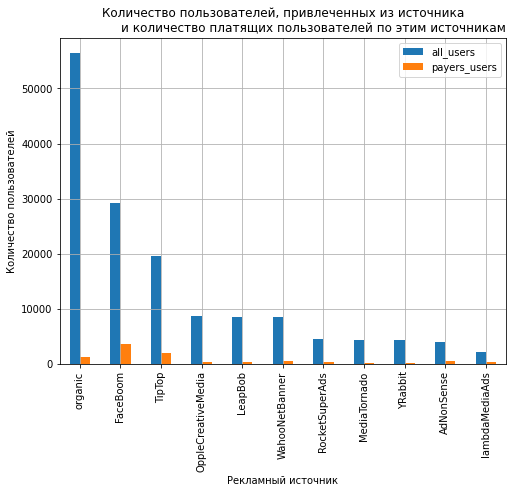

In [42]:
plot_count_user(count_profiles_by_channel,
                '''Количество пользователей, привлеченных из источника
                и количество платящих пользователей по этим источникам''', 'Рекламный источник')

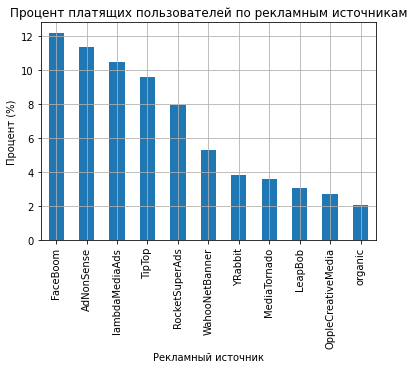

In [43]:
plot_percent_payer_user(count_profiles_by_channel,
                       'Процент платящих пользователей по рекламным источникам', 'Рекламный источник')

Больше всего пользователей приходят сами, из органического источника, на втором и третьем месте располагаются платформы FaceBoom, TipTop. Меньше всего пользоателей приходит из платформы lambdaMediaAds.

Самую большую долю платящих пользователей приводит платформа Faceboom, AdNonSense, lambdaMediaAds. Хуже всего пользователи конвертируются в платящих пользователей из источника organic.

### Мини-вывод

- максимальная дата привлечения пользователей - ```2019-10-27```;
- минимальная дата привлечения пользователей - ```2019-05-01```;
- больше всего пользователей из Америки;
- большая доля платящих пользователей из Америки;
- больше всего пользователей пользуются iPhone;
- большая доля платящих пользователей пользуются Mac;
- больше всего пользователей пришло из органического источника;
- большая доля платящих пользователей у платформы FaceBoom.

## Маркетинг

### Расходы на маркетинг

In [44]:
f"Всего на маркетинг было потрачено: {round(costs['costs'].sum(), 2)}"

'Всего на маркетинг было потрачено: 105497.3'

Посмотрим сколько было потрачено средств на каждый рекламный канал.

In [45]:
costs_market = costs.groupby('channel').agg({'costs': 'sum'})
costs_market['percent (%)'] = round(costs_market['costs'] * 100 / costs_market['costs'].sum(), 2)
costs_market = costs_market.sort_values(by='costs', ascending=False)
costs_market

,costs,percent (%)
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


<Axes: title={'center': 'Количество потраченных средств на каждый рекламный канал'}, xlabel='Канал', ylabel='Стоимость'>

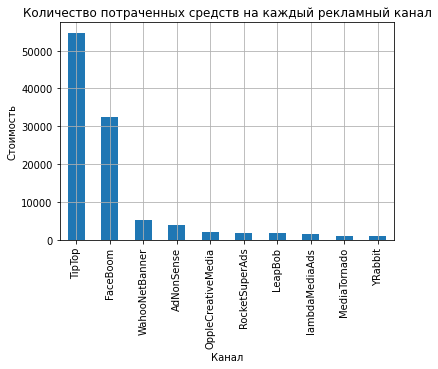

In [46]:
(
    costs_market['costs']
    .plot(kind='bar', grid=True,
          xlabel='Канал', ylabel='Стоимость',
          title='Количество потраченных средств на каждый рекламный канал'
         )
)

По полученному графику можно увидеть что больше всего расходов приходится на платформы TipTop и FaceBoom.

Рассмотрим динамику изменений расходов на различные источники в разрезе недель и месяцев.

Для начала создадим новые необходимые столбцы.

In [47]:
costs['month'] = costs['full_dt'].dt.month
costs['week'] = costs['full_dt'].dt.isocalendar().week
costs.head()

,dt,channel,costs,full_dt,month,week
0,2019-05-01,FaceBoom,113.3,2019-05-01,5,18
1,2019-05-02,FaceBoom,78.1,2019-05-02,5,18
2,2019-05-03,FaceBoom,85.8,2019-05-03,5,18
3,2019-05-04,FaceBoom,136.4,2019-05-04,5,18
4,2019-05-05,FaceBoom,122.1,2019-05-05,5,18


Далее построим графики по неделям.

<Axes: title={'center': 'Динамика раcходов по неделям для различных рекламных каналов'}, xlabel='Неделя', ylabel='Расход'>

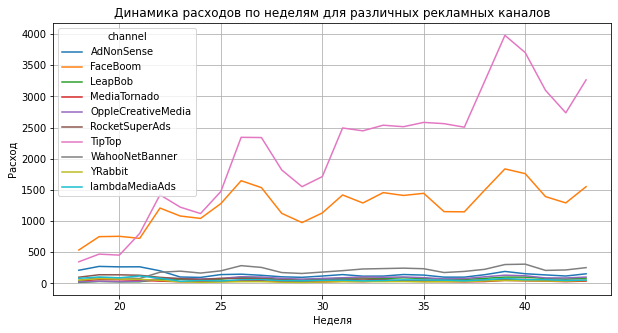

In [48]:
costs.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='sum'
).plot(kind='line', figsize=(10, 5), grid=True,
       xlabel='Неделя', ylabel='Расход',
       title='Динамика раcходов по неделям для различных рекламных каналов'
      )

По полученному графику можно выявить тенденцию на увеличение раходов во времени и выдлеить лидеров по расходам, как и показывал график выше - это TipTop и FaceBoom.

Рассмотрим график для каждой платформы отдельно. 

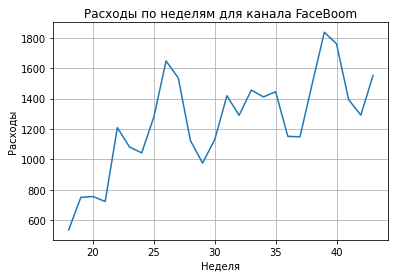

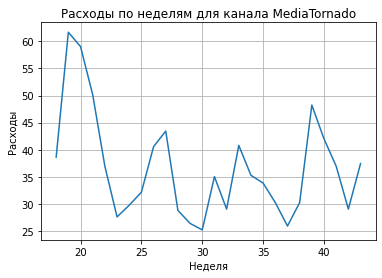

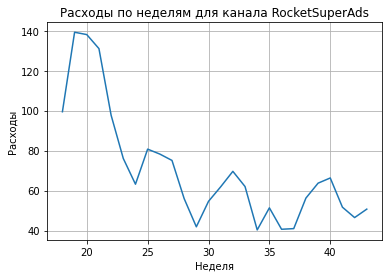

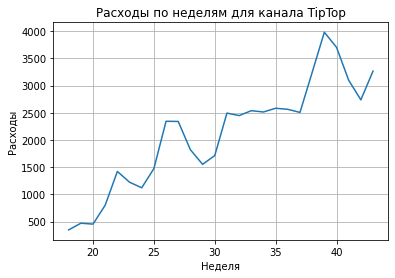

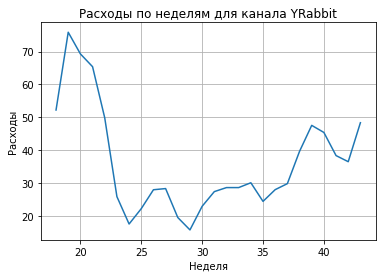

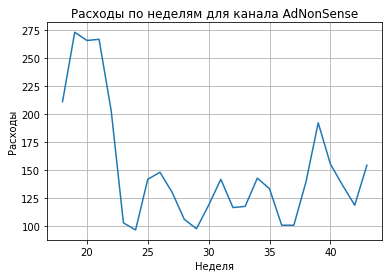

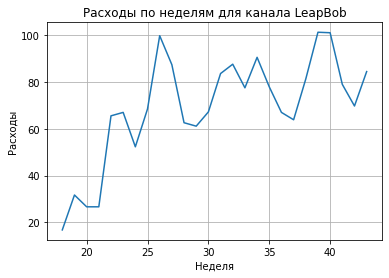

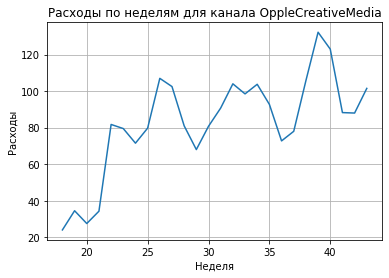

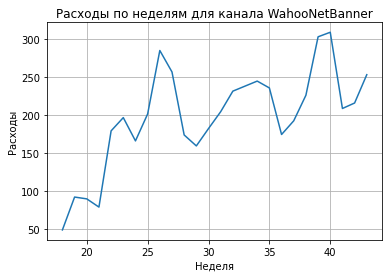

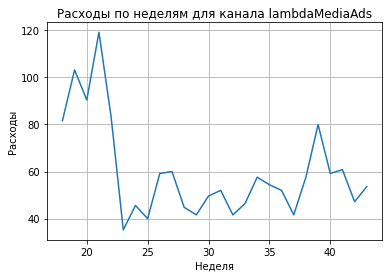

In [49]:
for channel in costs['channel'].unique():
    (
        costs.query('channel == @channel')
        .groupby('week')['costs'].sum()
        .plot(kind='line', grid=True,
              xlabel='Неделя', ylabel='Расходы',
              title=f'Расходы по неделям для канала {channel}'
             )
    )
    
    plt.show()

По полученным графикам можно сделать следующие выводы по платформам:
- тенденция роста расходов по неделям наблюдается у платформ:
  - FaceBoom,
  - TipTop,
  - OppleCreativeMedia,
  - LeapBob,
  - WahooNetBanner;
- тенденция к снижению расходов по неделям наблюдается у платформ:
  - MediaTornado,
  - RocketSuperAds,
  - AdNonSense,
  - YRabbit,
  - lambdaMediaAds.

Построим графики в месячном разрезе.

<Axes: title={'center': 'Динамика расходов по месяцам для различных рекламных каналов'}, xlabel='Месяц', ylabel='Расход'>

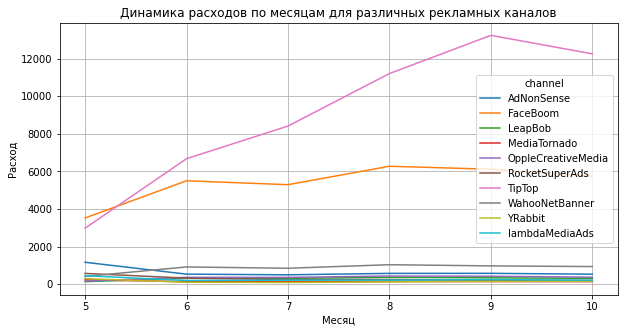

In [50]:
costs.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='sum'
).plot(kind='line', figsize=(10, 5), grid=True,
       xlabel='Месяц', ylabel='Расход', rot=0,
       title='Динамика расходов по месяцам для различных рекламных каналов'
      )

В помесячном разрезе также наблюдается тенденция к росту расходов, лидеры по расходам те же.

Рассмотри каждую платформу отдельно.

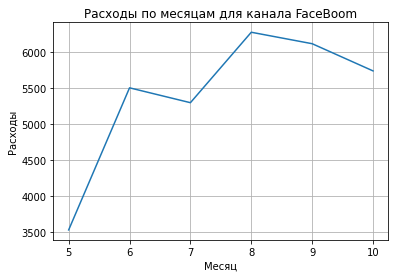

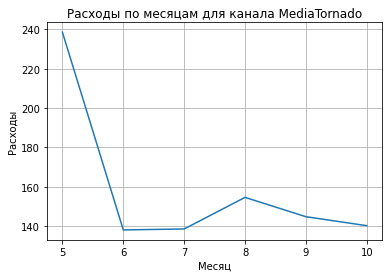

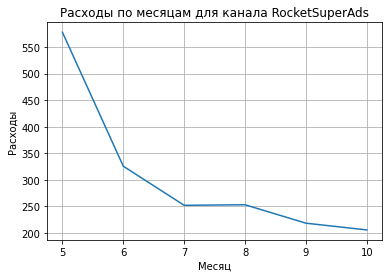

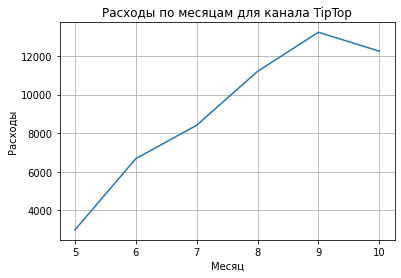

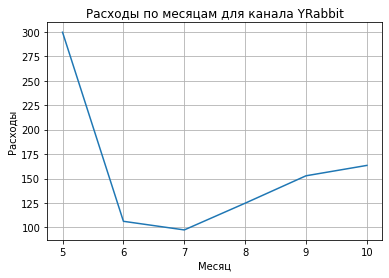

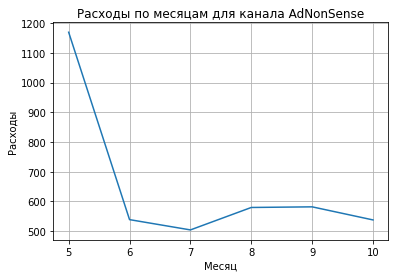

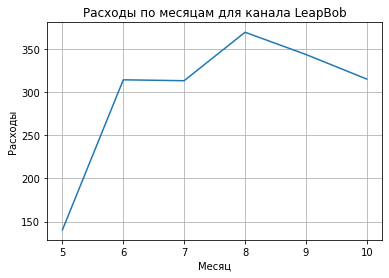

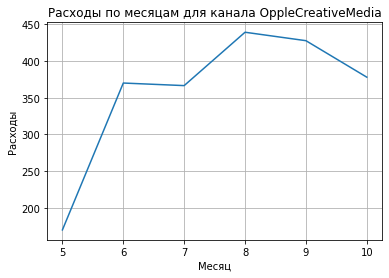

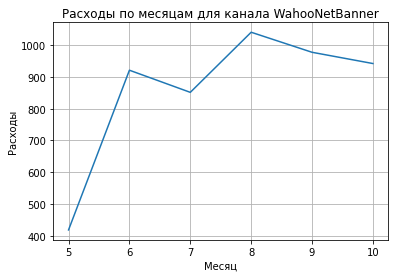

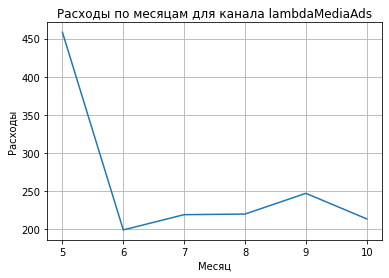

In [51]:
for channel in costs['channel'].unique():
    (
        costs.query('channel == @channel')
        .groupby('month')['costs'].sum()
        .plot(kind='line', grid=True,
              xlabel='Месяц', ylabel='Расходы',
              title=f'Расходы по месяцам для канала {channel}'
             )
    )
    
    plt.show()

Тенденции к росту или снижению расходов в месячном разрезе для рекламных источников такие-же как и у недельных.

### Средняя стоимость привлечения пользователя по рекламным каналам

In [52]:
profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

По представленому списку выше можно увидеть что самое дорогое привлечение у платформы TipTop (2.8 усл.ед.), далее по стоимости идут платформы FaceBoom и AdNonSense (примерно 1 усл.ед.), самые дешевые по привлечению платформы - это YRabbit, MediaTornado, LeapBob (примерно 0.22 усл.ед.).

### Мини-вывод

Всего на меркетинг за изучаемый период было потрачено 105 497.3 усл.ед.

Больше всего раходов приходится на платформы TipTop и FaceBoom.

Расходы на маркетинг в течение времени постоянно увеличиваются у платформы TipTop; медленно, но увеличиваются расходы на платформу FaceBoom; остальные платформы имеют стабильные расходы в течение времени.

Самая дорогая средняя стоимость привлечения пользователя у платформ TipTop (2.8 усл.ед.), FaceBoom и AdNonSense (примерно 1 усл.ед.).

## Оценка окупаемости рекламы

In [53]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
profiles_without_organic = profiles.query('channel != "organic"')
profiles_without_organic['channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

### Анализ LTV и ROI

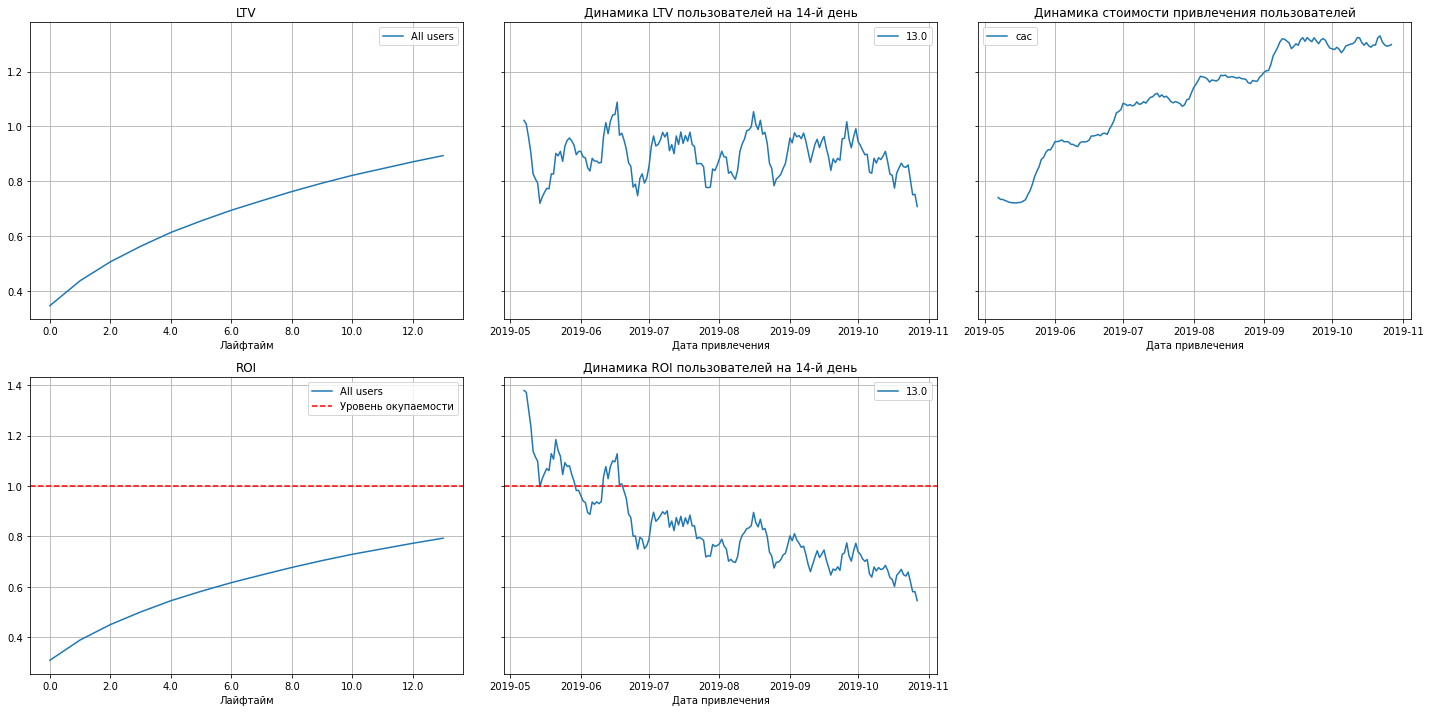

In [54]:
(
    ltv_df_raw,
    ltv,
    ltv_in_time,
    roi,
    roi_in_time
) = get_ltv(profiles_without_organic, orders, observation_date, horizon_days)
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days)

По полученным графикам можно сделать выводы:
- реклама не окупается, на канец 2 недели ROI не достигает 100%,
- рекламный бюджет увеличиают, а ROI в течение времени падает, в конце июля ROI оказывается ниже черты в 100%, получается реклама перестает приносить должный доход, клиентов,
- LTV стабилен в динамике времени.

### Анализ конверсии и удержания пользователей

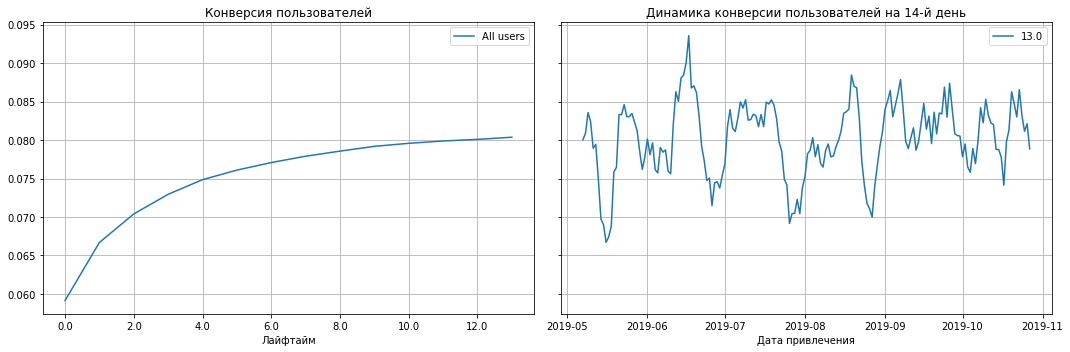

In [55]:
(
    conversion_raw,
    conversion,
    conversion_in_time
) = get_conversion(profiles_without_organic, orders, observation_date, horizon_days)
plot_conversion(conversion, conversion_in_time, horizon_days)

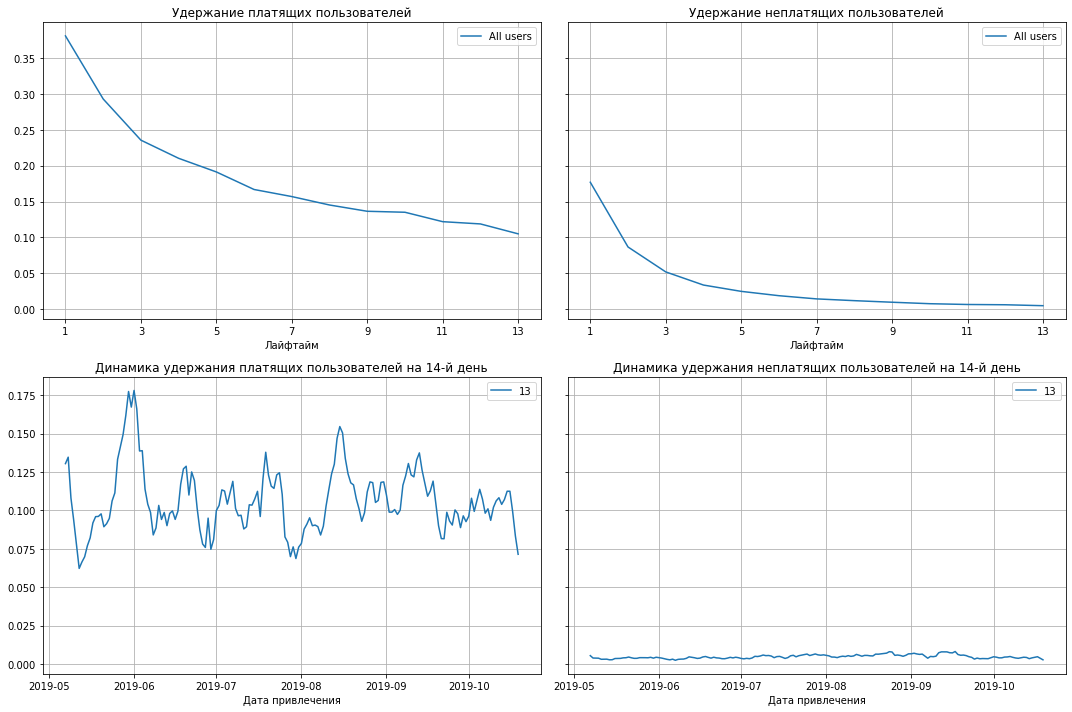

In [56]:
(
    retention_raw,
    retention,
    retention_in_time
) = get_retention(profiles_without_organic, visits, observation_date, horizon_days)
plot_retention(retention, retention_in_time, horizon_days)

По полученным графикам можно сделать выводы, что для всех пользователей:
- коверсия на конец второй недели составляет около 8%,
- в динамике конверсия на конец второй недели составляет в среднем 8%,
- удержание на конец второй недели для платящих пользователей составляет около 10%,
- для неплатящих около 0%,
- в динамике удержание стабильное.

В целом серьезных изменений в качествве пользоателей нет.

### Анализ LTV и ROI с разбивкой по устройствам

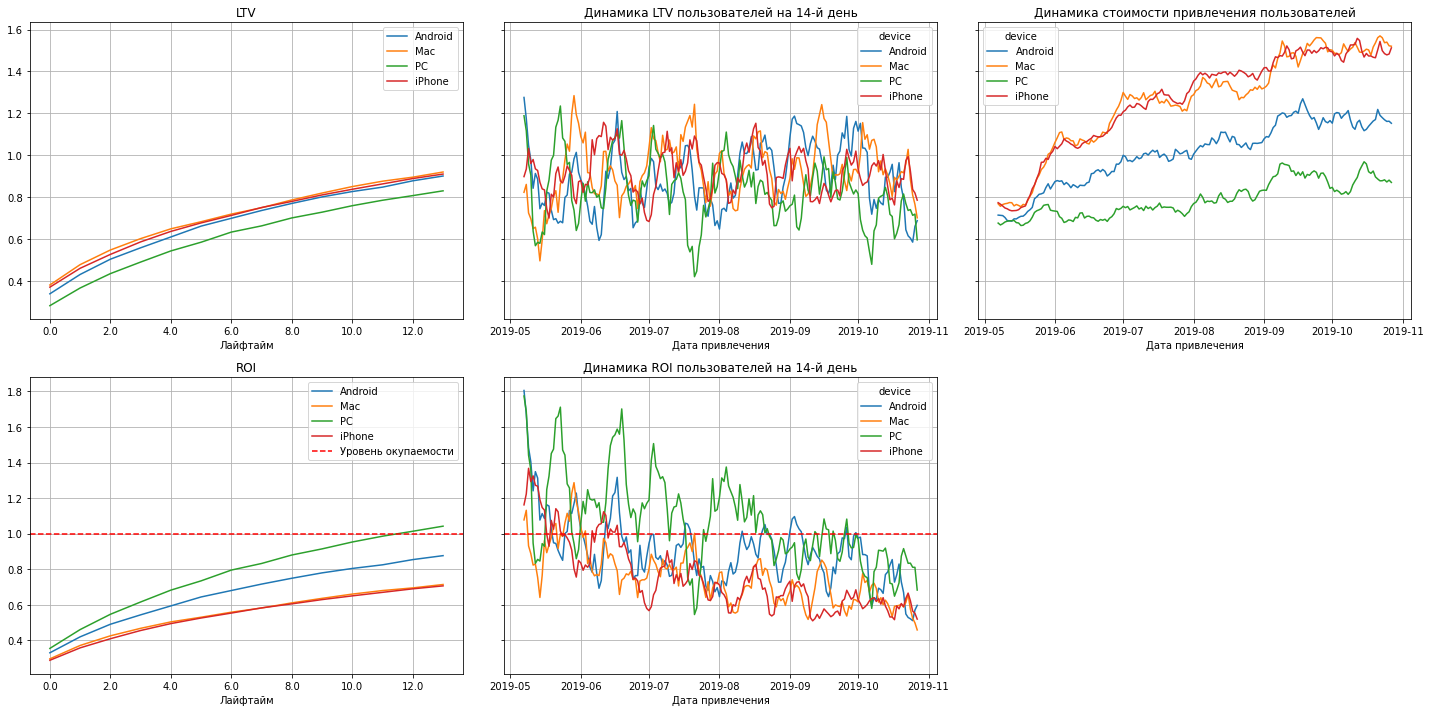

In [57]:
(
    ltv_df_raw,
    ltv,
    ltv_in_time,
    roi,
    roi_in_time
) = get_ltv(profiles_without_organic, orders, observation_date, horizon_days, dimensions=['device'])
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days)

По графикам можно увидеть, что LTV у пользователей разных устройств не сильно отличается, разве что пользователи PC имеют чуть меньшую ценность.

Стоимость же привлечения у пользователей сильно отличется, самыми дорогами считаются пользователи iPhone и Mac, именно поэтому ROI этих пользователей не окупается. В то время как пользователи PC окупаются, их ROI на конец второй недели составляет чуть более 100%.

Проблема с плохой окупаемостью рекламы скорее всего не связана с типом устройства.

Рассмотрим также конверсию и удержание в разбивке по устройствам.

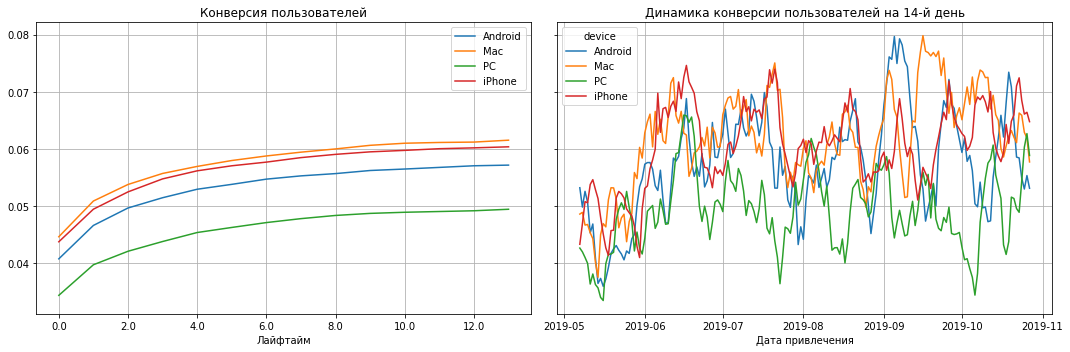

In [58]:
(
    conversion_raw,
    conversion,
    conversion_in_time
) = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_conversion(conversion, conversion_in_time, horizon_days)

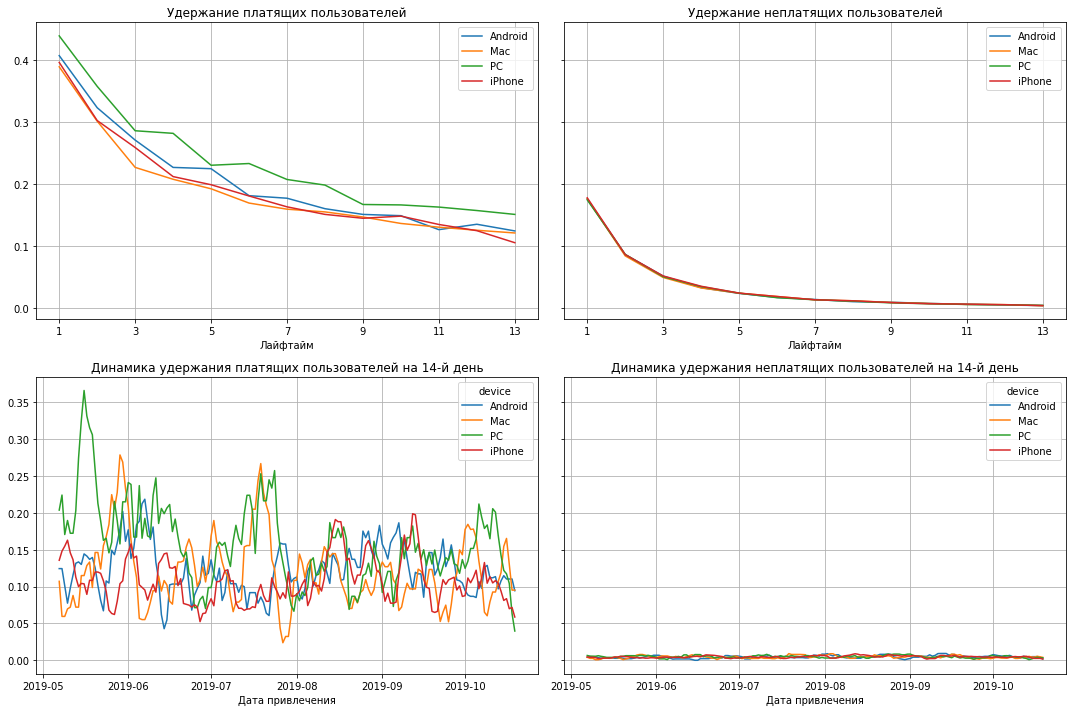

In [59]:
(
    retention_raw,
    retention,
    retention_in_time
) = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['device'])
plot_retention(retention, retention_in_time, horizon_days)

Неожиданных новых выводов по данным сделать мы не можем, все стабильно, соответствует графику выше с LTV, ROI, CAC.

### Анализ LTV и ROI с разбивкой по странам

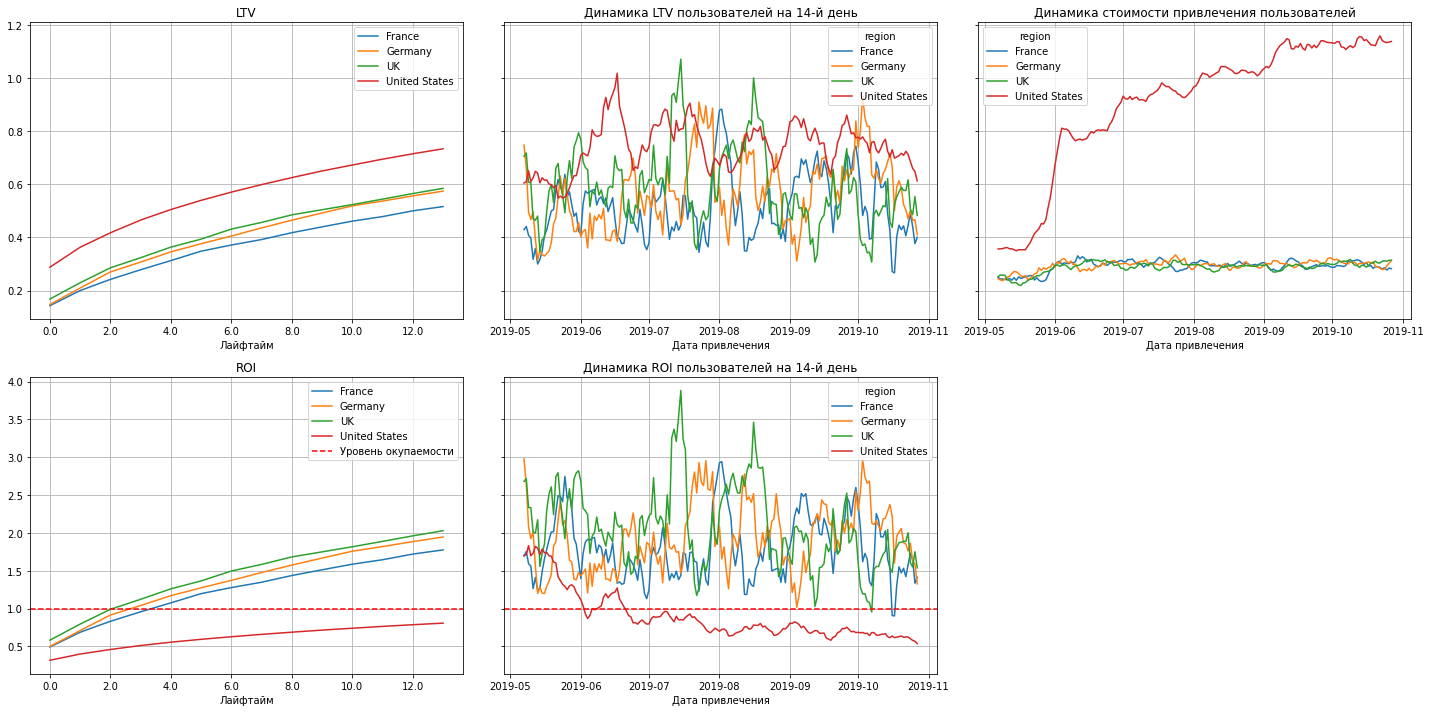

In [60]:
(
    ltv_df_raw,
    ltv,
    ltv_in_time,
    roi,
    roi_in_time
) = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days)

По этим графикам видно явно выбивающиеся значения пользователей из Америки.

LTV пользователей из Америки на конец 2ой недели составляет примерно 0.75, когда LTV пользователей из остальных стран в среднем 0.5, а разница между стоимостью этих пользователей огромная.

В течение времени CAC пользователей из Америки увеличивался, а CAC пользователей из других стран особо не менялся. Средняя разница между стоимостью пользователей из Америки и стоимостью пользователей из других стран составляет примерно 0.7!

ROI (инвестиции) не окупаются у пользователей из Америки, их максимум 90%, в то время как ROI других стран пересекает черту в 150% процентов. ROI в динамике у пользователей из Америки падает.

Так как большинство пользователей нашей платформы из США, это наш основной рынок, который определяет окупаемость рекламы.

Рассмотрим конверсию и удержание с разбивкой по странам.

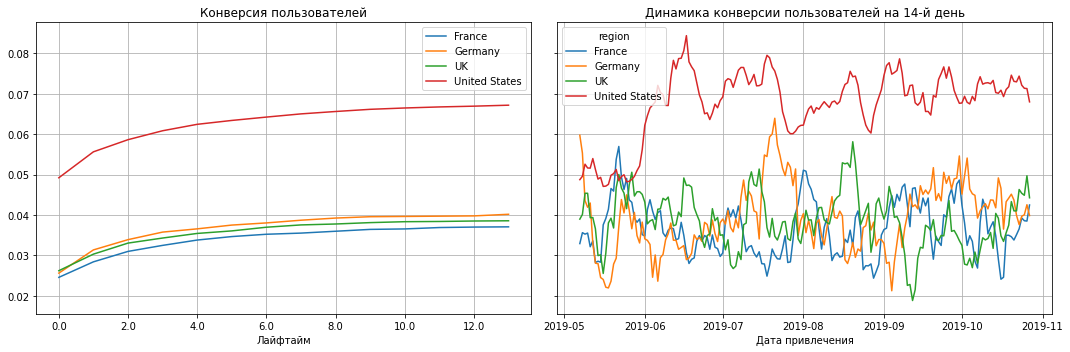

In [61]:
(
    conversion_raw,
    conversion,
    conversion_in_time
) = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_conversion(conversion, conversion_in_time, horizon_days)

Конверсия для пользователей из Америки высокая (почти 7%).

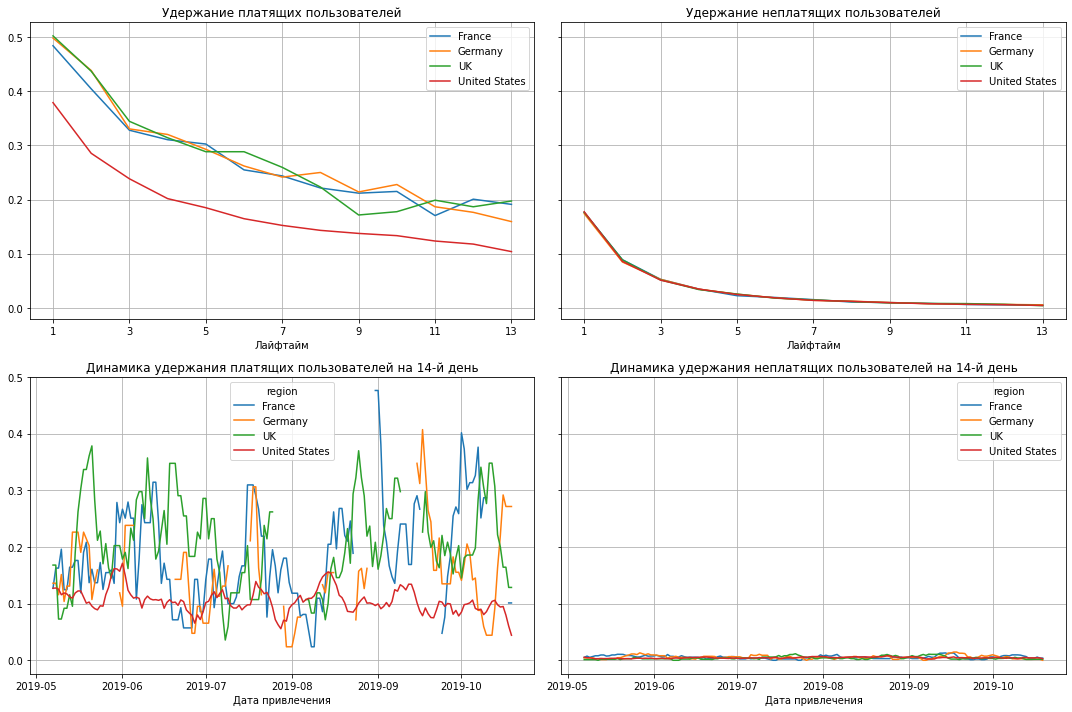

In [62]:
(
    retention_raw,
    retention,
    retention_in_time
) = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['region'])
plot_retention(retention, retention_in_time, horizon_days)

А вот с удержанием имеются проблемы, почему-то пользователи из Америки удерживаются хуже, чем пользователи из других стран.

### Анализ LTV и ROI с разбивкой по рекламным каналам

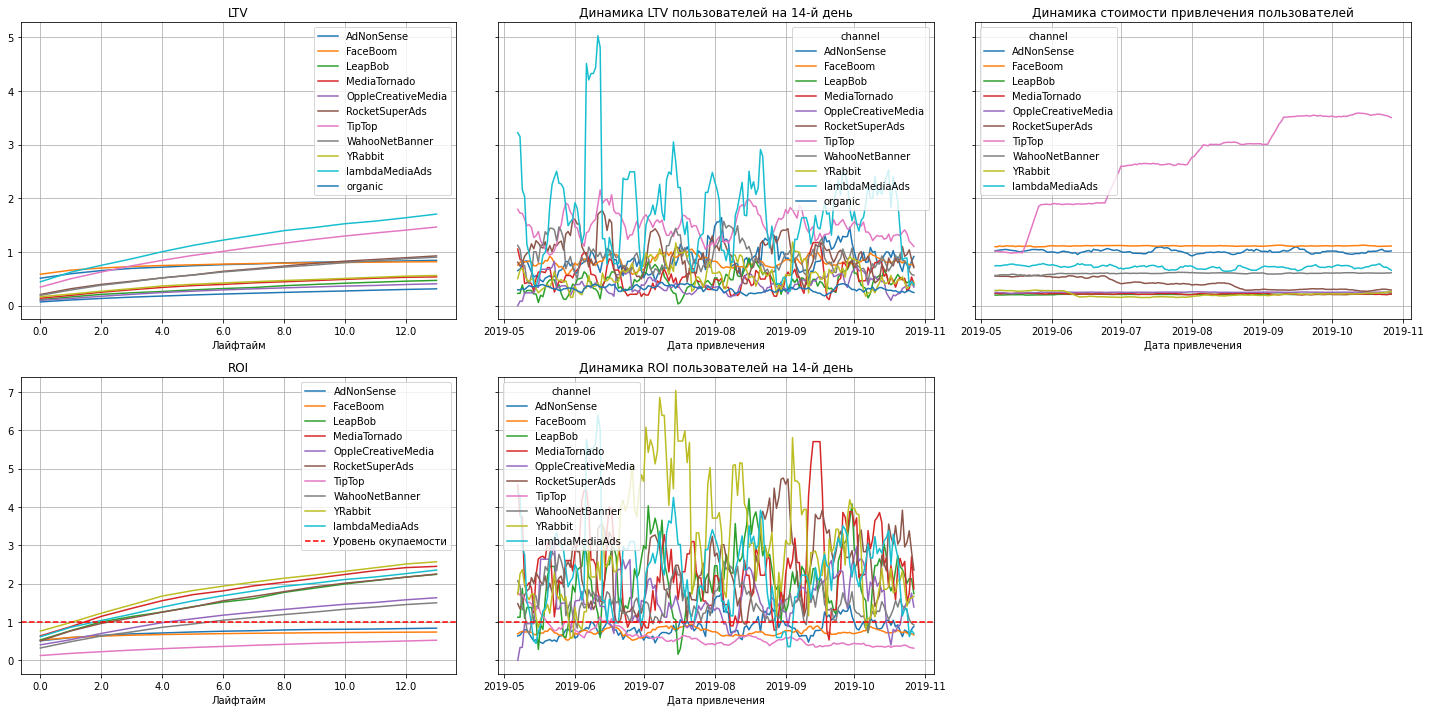

In [63]:
(
    ltv_df_raw,
    ltv,
    ltv_in_time,
    roi,
    roi_in_time
) = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv, ltv_in_time, roi, roi_in_time, horizon_days)

На данных графиках ярко выделяется только график стоимости привлечения пользователей, где выделяется платформа TipTop, стоимость привлечения пользователей в течение времени растет, когда стоимость привлечения пользователей других платформ достаточно статична в течение времени.

В это же время на первое место по LTV вырывается платформа lambdaMediaAds, а уже на втором платформа TipTop. А сюда по графику ROI, на конец 2ой недели черту окупаемости не достигают пользователи из платформ AdNonSense, FaceBoom и TipTop.

Рассмотрим конверсию и удержание с разбивкой по источникам.

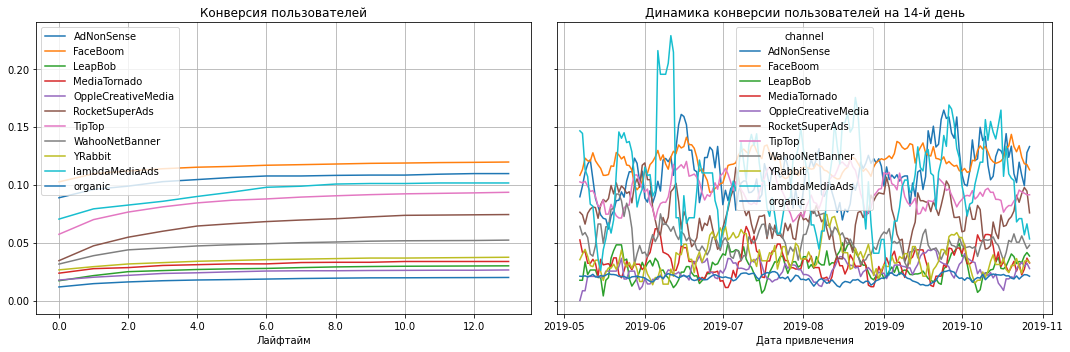

In [64]:
(
    conversion_raw,
    conversion,
    conversion_in_time
) = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion, conversion_in_time, horizon_days)

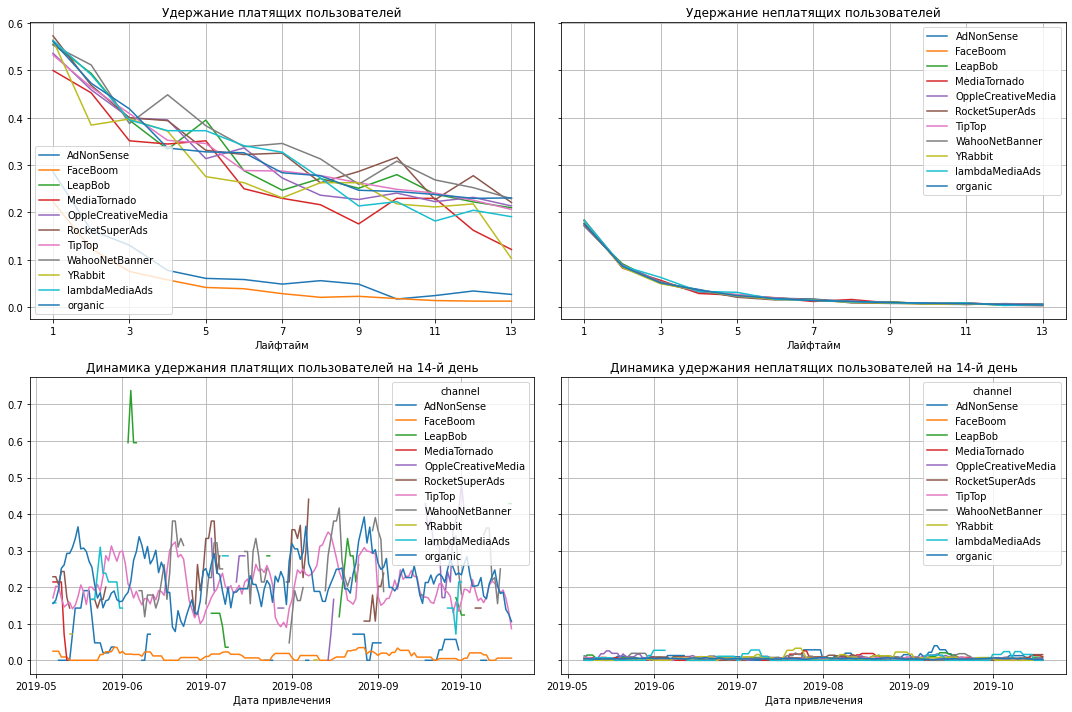

In [65]:
(
    retention_raw,
    retention,
    retention_in_time
) = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['channel'])
plot_retention(retention, retention_in_time, horizon_days)

По графикам выше мы можем увидеть, что платформа TipTop, на которую тратится так много рекламного бюджета имеет такое же удержание, как и у других платформ, а конвертируется хуже некоторых платформ, на которые тратится значительно меньше бюджета.

Так же на графике удержания платящих пользователей можно увидеть, что платформы AdNonSense и FaceBoom имеют удержание пользователей ниже, чем другие рекламные каналы.

Рассмотрим конверсию и удержание в разбивке по каналам привлечения отдельно для пользователей из США.

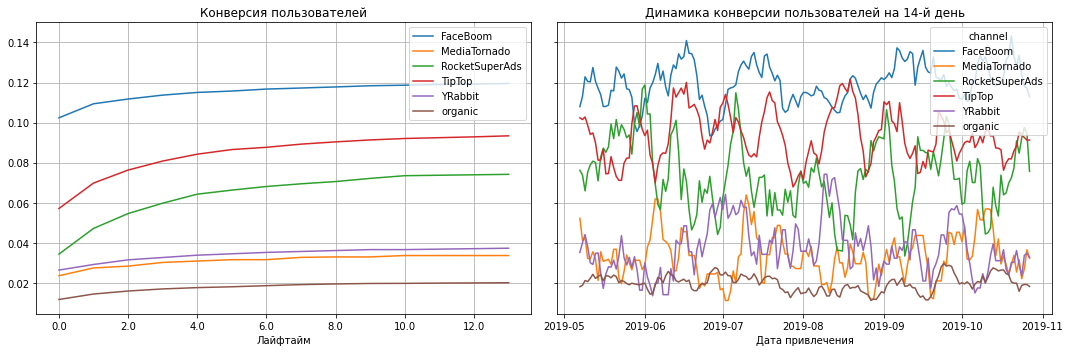

In [66]:
(
    conversion_raw,
    conversion,
    conversion_in_time
) = get_conversion(profiles.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion, conversion_in_time, horizon_days)

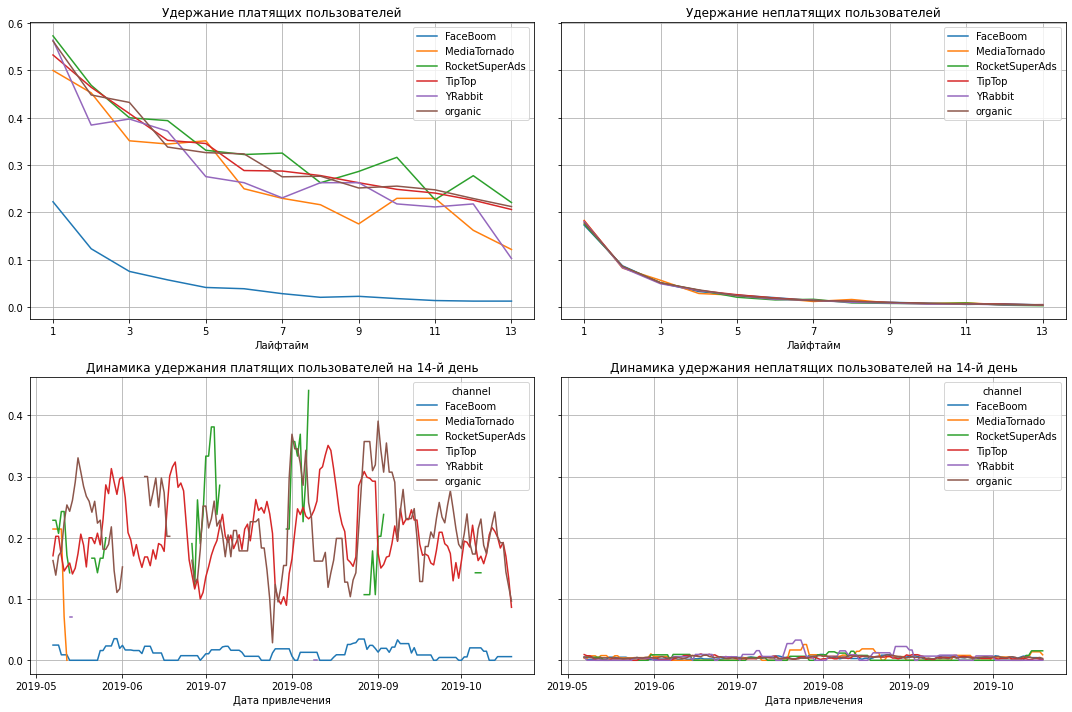

In [67]:
(
    retention_raw,
    retention,
    retention_in_time
) = get_retention(profiles.query('region == "United States"'), visits, observation_date, horizon_days, dimensions=['channel'])
plot_retention(retention, retention_in_time, horizon_days)

По графикам выше можно увидеть, что пользователи из США, которые приходят с платформы FaceBoom имеют очень плохое удеражние.

В тоже время можно выделить платформу RocketSuperAds, как потенциальную платформу для инвестирования, хорошее удержание и достаточно хорошая конверсия.

### Мини-вывод

В общем, реклама, направленная на привлечение пользователей, не окупается.

Негативное влияние на окупаемость могут влиять:
- пользователи из Америки, привлеченные из FaceBoom, на их привлечение тратится много рекламных средств, но эти пользователи имеют очень плохое удержание, хотя конверсия у них хорошая;
- рекламная платформа TipTop, так как много рекламного бюджета идет на эту платформу, но ее конверсия, удержание и LTV не особо отличаются от других платформ;
- рекламные платформы AdNonSense и FaceBoom, так как на них также тратится больше средств, чем на другие платформы, но эти платформы имеют плохое удержание (неизвестно почему).

Проблемы у *пользователей из Америки, пришедших из FaceBoom* могут быть возможно из-за неверной рекламной кампании, проводящейся на платформе FaceBoom, возможно она ориентированна не на Американских людей. **Совет:** изучить почему пользователи из Америки, пришедшие из FaceBoom, плохо удерживаются и исправить, так же возможно следует уделить внимание и пользователям из других стран, так как они тоже имеют не плохие показатели.

Проблемы у *платформ AdNonSense и FaceBoom* в удержании могут возникнуть, как сказано выше, по причине особенности проведения рекламных кампаний на этих платформах. **Совет:** следует выяснить почему пользователи из этих платформ имеют удержание хуже чем у других платформ и исправить.

**Совет:** по *платформе TipTop* возможно не стоит столько средст пускать только в эту платформу, так как это не дает должных результатов, можно бюджет диверсифицировать.

## Общий вывод

**На входе** у нас имелось развлекательное приложение Procrastinate Pro+ и данные о посещениях этого приложения пользователями, привлечёнными с 1 мая по 27 октября 2019 года, покупках этих пользователей и затратах на рекламу.

После загрузки и изучения данных мы перешли их **пребодработке**, в ходе которой было сделано:
- названия столцов были исправлены,
- типа данных столбцов тоже были исправлены,
- была выполнена проверка таблиц на дупликаты.

Далее мы **подготовили необходимые функция для анализа данных**. Это функции для расчета удержания, конверсии, LTV, CAC, ROI а также для визуализации этих параметров.

После этого мы приступили к **исследовательскому анализу**, в ходе которого было выяснено:
- максимальная дата привлечения пользователей - ```2019-10-27```;
- минимальная дата привлечения пользователей - ```2019-05-01```;
- больше всего пользователей из Америки;
- большая доля платящих пользователей из Америки;
- больше всего пользователей пользуются iPhone;
- большая доля платящих пользователей пользуются Mac;
- больше всего пользователей пришло из органического источника;
- большая доля платящих пользователей у платформы FaceBoom.

Далее мы приступили к **изучению трат на маркетинг**, в ходе которого выяснили:
- всего на меркетинг за изучаемый период было потрачено 105 497.3 усл.ед.;
- больше всего раходов приходится на платформы TipTop и FaceBoom;
- расходы на маркетинг в течение времени постоянно увеличиваются у платформы TipTop;
- медленно, но увеличиваются расходы на платформу FaceBoom;
- остальные платформы имеют стабильные расходы в течение времени;
- самая дорогая средняя стоимость привлечения пользователя у платформ TipTop (2.8 усл.ед.), FaceBoom и AdNonSense (примерно 1 усл.ед.).

Далее мы перешли к **анализу окупаемости рекламы** и выяснили:
- в целом реклама, направленная на привлечение пользователей, не окупается;
- негативное влияние на окупаемость оказывают:
  - пользователи из Америки, привлеченные через платформу FaceBoom,
  - платформы TipTop, FaceBoom и AdNonSense.
  
**Рекомендации:**
- пересмотреть траты рекламного бюджета по платформам, возможно выявить более продуктивные платформы (может это lambddaMediaAds);
- для пользователей из США узнать причину почему они плохо удерживаются, особенно пользователи пришедшие с платформы FaceBoom, и исправить;
- так же для пользователей из США  можно рассмотреть платформу RocketSuperAds, в качестве потенциально прибыльной, так как пользователи с этой платформы имеют хорошее удержание и неплохую конверсию;
- стоит присмотреться к пользователям из других стран, они имеют неплохие показатели при небольших вложениях;
- изучить почему у платформ FaceBoom и AdNonSense меньше удержание чем у других платформ и исправить.